In [19]:
import json
import numpy as np
import matplotlib.pyplot as plt



In [20]:
# Convert back the keys after loading the JSON (restore original types)
def convert_keys_from_string(d):
    new_dict = {}
    for key, value in d.items():
        # Example: converting back to int, but can be customized for tuples, etc.
        if key.isdigit():  # You can add more sophisticated type checks
            new_dict[int(key)] = value
        else:
            new_dict[key] = value
    return new_dict

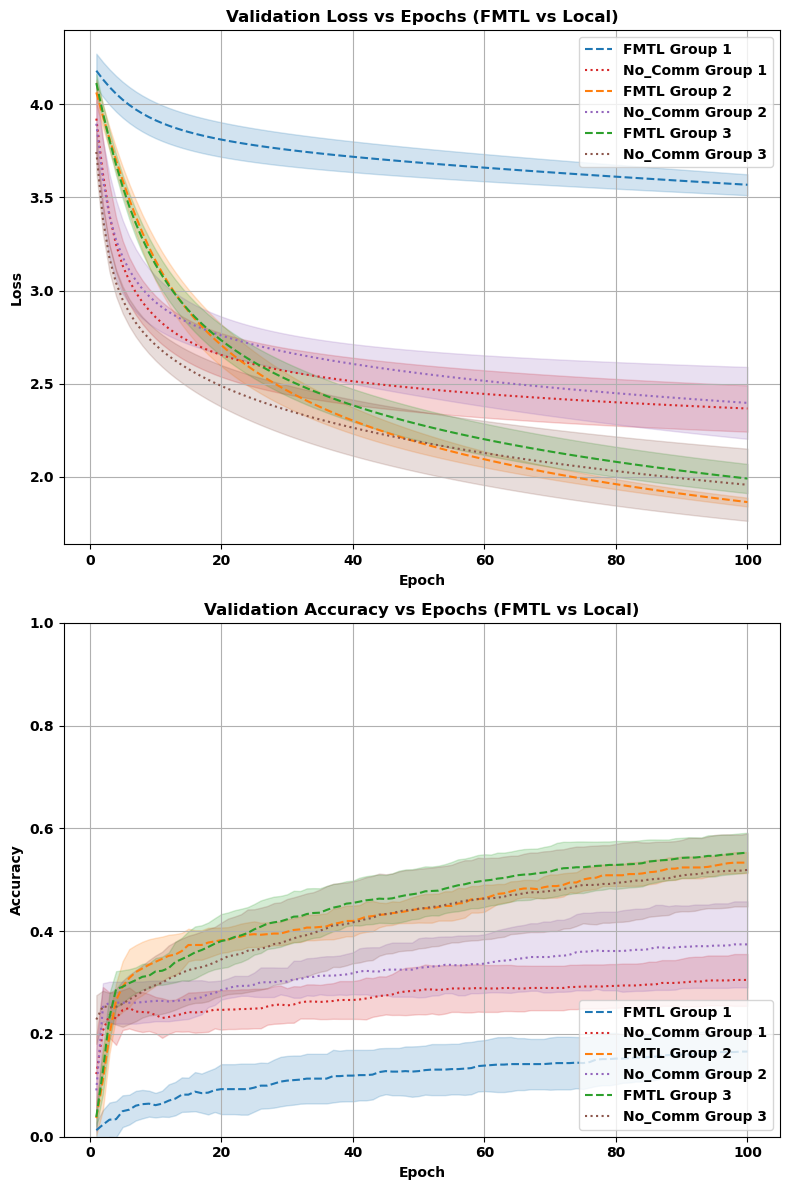

In [15]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
#no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20_FL.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'

# Load the metrics from both JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_train_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_train_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_mean'].items()}
no_comm_group_train_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_mean'].items()}
no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_train_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_std'].items()}
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_train_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_train_acc_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_train_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_loss_std'].items()}
no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_train_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_train_acc_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

# Combined Plot for FMTL and No_Comm Modalities
plt.figure(figsize=(8, 12))

# Loss Plot (Training Loss)
'''
plt.subplot(2, 2, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_train_loss_histories[group]) + 1), fmtl_group_train_loss_histories[group], label=f"FMTL Group {group}", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_train_loss_histories[group]) + 1), 
                     fmtl_group_train_loss_histories[group] - fmtl_group_train_loss_std[group], 
                     fmtl_group_train_loss_histories[group] + fmtl_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_train_loss_histories[group]) + 1), no_comm_group_train_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_train_loss_histories[group]) + 1), 
                     no_comm_group_train_loss_histories[group] - no_comm_group_train_loss_std[group], 
                     no_comm_group_train_loss_histories[group] + no_comm_group_train_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Training Loss vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()
'''

# Loss Plot (Validation Loss)
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
                     fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
                     fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Loss vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()


# Accuracy Plot (Validation Accuracy)
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
                     fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
                     fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"No_Comm Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')

plt.title("Validation Accuracy vs Epochs (FMTL vs Local)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])  # Ensure y-axis is between 0 and 1 for accuracy
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()
#plt.savefig('validation_acc_loss_FMTL_Local.png')
plt.show()


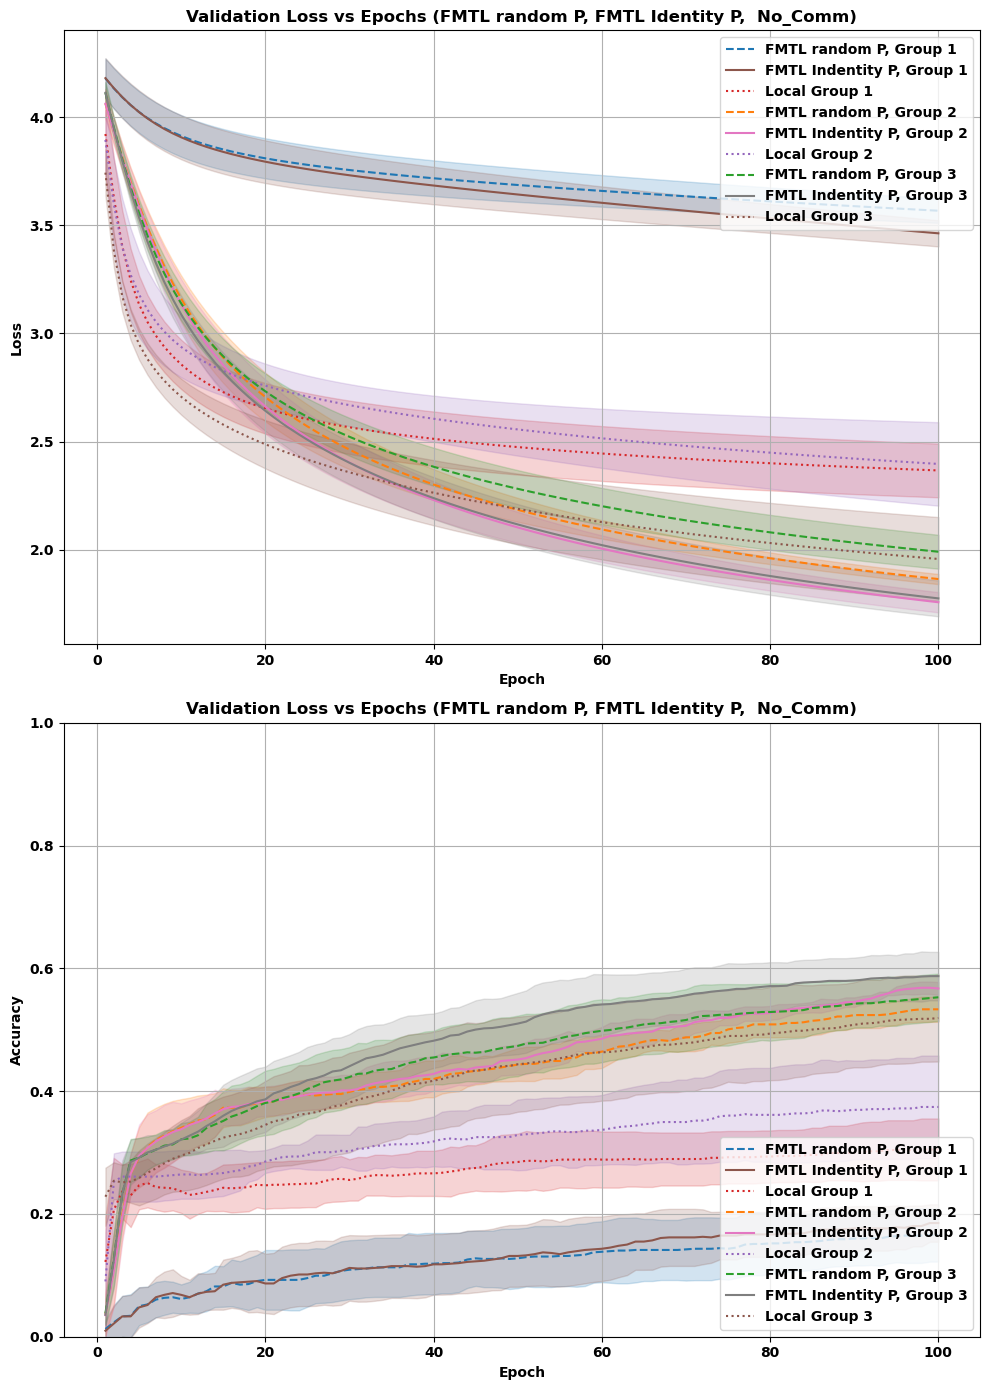

In [20]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'
new_metric_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_eye_P.json'

# Load the metrics from all JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

with open(new_metric_file, 'r') as f:
    new_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

new_group_val_loss_histories = {k: np.array(v) for k, v in new_metrics['group_val_loss_mean'].items()}
new_group_val_accuracy_histories = {k: np.array(v) for k, v in new_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

new_group_val_loss_std = {k: np.array(v) for k, v in new_metrics['group_val_loss_std'].items()}
new_group_val_acc_std = {k: np.array(v) for k, v in new_metrics['group_val_acc_std'].items()}

# Plotting
plt.figure(figsize=(10, 14))

# Validation Loss
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
                     fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
                     fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')

        # Plot New Metric
    plt.plot(range(1, len(new_group_val_loss_histories[group]) + 1), new_group_val_loss_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    plt.fill_between(range(1, len(new_group_val_loss_histories[group]) + 1), 
                     new_group_val_loss_histories[group] - new_group_val_loss_std[group], 
                     new_group_val_loss_histories[group] + new_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+4}')

    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
                     no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
                     no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Validation Accuracy
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
                     fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
                     fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)-1}')
    # Plot New Metric
    plt.plot(range(1, len(new_group_val_accuracy_histories[group]) + 1), new_group_val_accuracy_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    plt.fill_between(range(1, len(new_group_val_accuracy_histories[group]) + 1), 
                     new_group_val_accuracy_histories[group] - new_group_val_acc_std[group], 
                     new_group_val_accuracy_histories[group] + new_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+4}')
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
                     no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
                     no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
                     alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()

plt.savefig('validation_acc_loss_FMTL_Local_random_vs_eye.png')

plt.show()


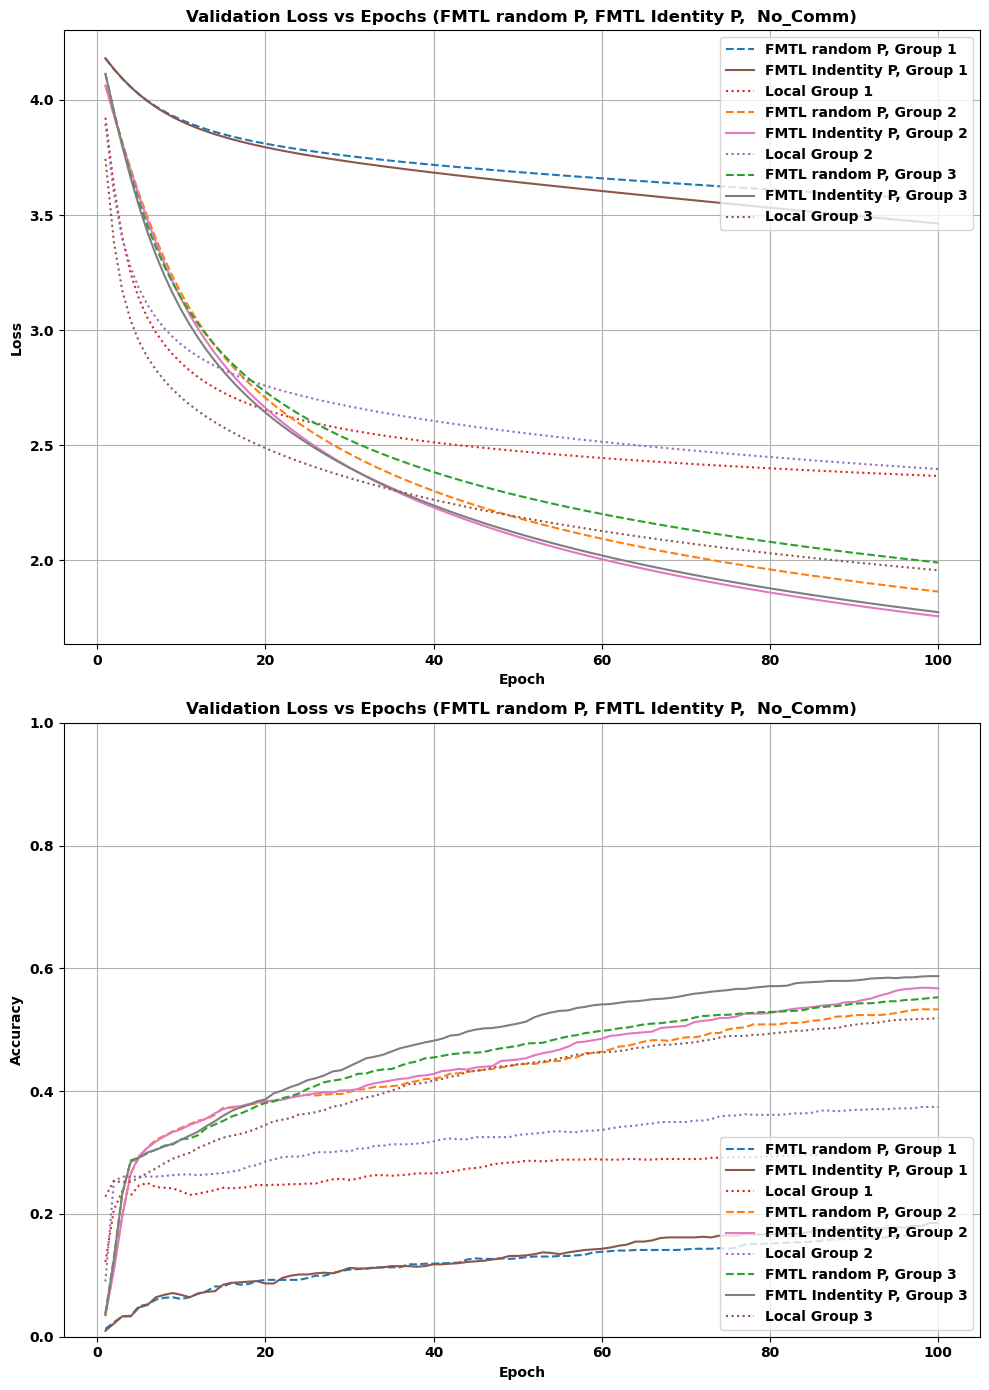

In [23]:
import json
import numpy as np
import matplotlib.pyplot as plt

# Define the path to the metrics files
metrics_directory = "./"
fmtl_metrics_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_random_P.json'
no_comm_metrics_file = f'{metrics_directory}No_Comm_Metrics_20.json'
new_metric_file = f'{metrics_directory}FMTL_metrics_New_graph_0_2_FL_eye_P.json'

# Load the metrics from all JSON files
with open(fmtl_metrics_file, 'r') as f:
    fmtl_metrics = json.load(f)

with open(no_comm_metrics_file, 'r') as f:
    no_comm_metrics = json.load(f)

with open(new_metric_file, 'r') as f:
    new_metrics = json.load(f)

# Convert metrics to numpy arrays for easy manipulation
fmtl_group_train_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_train_loss_mean'].items()}
fmtl_group_val_loss_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_mean'].items()}
fmtl_group_val_accuracy_histories = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_mean'].items()}

no_comm_group_val_loss_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_mean'].items()}
no_comm_group_val_accuracy_histories = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_mean'].items()}

new_group_val_loss_histories = {k: np.array(v) for k, v in new_metrics['group_val_loss_mean'].items()}
new_group_val_accuracy_histories = {k: np.array(v) for k, v in new_metrics['group_val_acc_mean'].items()}

# Now load std values directly from the dictionary
fmtl_group_val_loss_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_loss_std'].items()}
fmtl_group_val_acc_std = {k: np.array(v) for k, v in fmtl_metrics['group_val_acc_std'].items()}

no_comm_group_val_loss_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_loss_std'].items()}
no_comm_group_val_acc_std = {k: np.array(v) for k, v in no_comm_metrics['group_val_acc_std'].items()}

new_group_val_loss_std = {k: np.array(v) for k, v in new_metrics['group_val_loss_std'].items()}
new_group_val_acc_std = {k: np.array(v) for k, v in new_metrics['group_val_acc_std'].items()}

# Plotting
plt.figure(figsize=(10, 14))

# Validation Loss
plt.subplot(2, 1, 1)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_loss_histories[group]) + 1), fmtl_group_val_loss_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_loss_histories[group]) + 1), 
    #                 fmtl_group_val_loss_histories[group] - fmtl_group_val_loss_std[group], 
    #                 fmtl_group_val_loss_histories[group] + fmtl_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')

        # Plot New Metric
    plt.plot(range(1, len(new_group_val_loss_histories[group]) + 1), new_group_val_loss_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    #plt.fill_between(range(1, len(new_group_val_loss_histories[group]) + 1), 
    #                 new_group_val_loss_histories[group] - new_group_val_loss_std[group], 
    #                 new_group_val_loss_histories[group] + new_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+4}')

    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_loss_histories[group]) + 1), no_comm_group_val_loss_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    #plt.fill_between(range(1, len(no_comm_group_val_loss_histories[group]) + 1), 
    #                 no_comm_group_val_loss_histories[group] - no_comm_group_val_loss_std[group], 
    #                 no_comm_group_val_loss_histories[group] + no_comm_group_val_loss_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc='upper right')
plt.grid()

# Validation Accuracy
plt.subplot(2, 1, 2)
for group in ['1', '2', '3']:
    # Plot FMTL
    plt.plot(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), fmtl_group_val_accuracy_histories[group], label=f"FMTL random P, Group {group}", linestyle="dashed", color=f'C{int(group)-1}')
    #plt.fill_between(range(1, len(fmtl_group_val_accuracy_histories[group]) + 1), 
    #                 fmtl_group_val_accuracy_histories[group] - fmtl_group_val_acc_std[group], 
    #                 fmtl_group_val_accuracy_histories[group] + fmtl_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)-1}')
    # Plot New Metric
    plt.plot(range(1, len(new_group_val_accuracy_histories[group]) + 1), new_group_val_accuracy_histories[group], label=f"FMTL Indentity P, Group {group}", linestyle="solid", color=f'C{int(group)+4}')
    #plt.fill_between(range(1, len(new_group_val_accuracy_histories[group]) + 1), 
    #                 new_group_val_accuracy_histories[group] - new_group_val_acc_std[group], 
    #                 new_group_val_accuracy_histories[group] + new_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+4}')
    # Plot No_Comm
    plt.plot(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), no_comm_group_val_accuracy_histories[group], label=f"Local Group {group}", linestyle="dotted", color=f'C{int(group)+2}')
    #plt.fill_between(range(1, len(no_comm_group_val_accuracy_histories[group]) + 1), 
    #                 no_comm_group_val_accuracy_histories[group] - no_comm_group_val_acc_std[group], 
    #                 no_comm_group_val_accuracy_histories[group] + no_comm_group_val_acc_std[group], 
    #                 alpha=0.2, color=f'C{int(group)+2}')



plt.title("Validation Loss vs Epochs (FMTL random P, FMTL Identity P,  No_Comm)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.grid()

plt.tight_layout()

plt.savefig('validation_acc_loss_FMTL_Local_random_vs_eye_mean.png')

plt.show()
